In [1]:
!pip install -q sklearn

In [29]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')
import numpy as n
from PIL import Image
from tensorflow import data 

import os
import numpy as np
import pathlib
import random
from datascience import *


print(tf.__version__)


2.2.0


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# 
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

##file id is obtained by entering the share settings of the file

file_id = '1IdNeYOHputshR8AImklK0sVpYq8fTsGP'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open3feetbig.csv")

file_id = '1ctGq5K29SN40eErcf41s_kgsIR2RES7F'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open9feetbig.csv")

file_id = '1c-70tU3y-woB61BqEmw6pM6cpVnEZoYR'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall3feetbig.csv")

file_id = '1yFC9ZIo-XQ2UzeTKeL6hZJXYKof5k40u'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall9feetbig.csv")

In [6]:
open3feet = pd.read_csv("open3feetbig.csv")
open9feet = pd.read_csv("open9feetbig.csv")
wall3feet = pd.read_csv("wall3feetbig.csv")
wall9feet = pd.read_csv("wall9feetbig.csv")
rssi_data = pd.DataFrame(data = {"open3feet" : open3feet["RSSI"],
                                 "open9feet" : open9feet["RSSI"],
                                 "wall3feet" : wall3feet["RSSI"],
                                 "wall9feet" : wall9feet["RSSI"]})
rssi_data

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
636,-65,NaN,NaN,NaN
637,-64,NaN,NaN,NaN
638,-65,NaN,NaN,NaN
639,-65,NaN,NaN,NaN


In [7]:
rssi_data500 = rssi_data.iloc[:500]
rssi_data500

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
495,-65,-59.0,-63.0,-72.0
496,-58,-65.0,-64.0,-74.0
497,-58,-65.0,-67.0,-74.0
498,-56,-65.0,-64.0,-75.0


In [8]:
bins = np.arange(-80,-50,0.35)

In [9]:
rssi_data500[['open3feet']].hist(bins=bins)
rssi_data500[['open9feet']].hist(bins=bins)
rssi_data500[['wall3feet']].hist(bins=bins)
rssi_data500[['wall9feet']].hist(bins=bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fd2c35390>]],
      dtype=object)

In [10]:
#start here
#bootstrapping all datas for more variability hoping to find distinguishments
open3 = []
open9 = []
wall3 = []
wall9 = []

for i in range(100):
  bootstrapsample = rssi_data500[['open3feet']].sample(n=500, replace=True)['open3feet']
  open3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['open9feet']].sample(n=500, replace=True)['open9feet']
  open9.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall3feet']].sample(n=500, replace=True)['wall3feet']
  wall3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall9feet']].sample(n=500, replace=True)['wall9feet']
  wall9.extend(bootstrapsample)


  



In [11]:
bootstrapdata = pd.DataFrame({"open3feet": open3,"open9feet":open9, "wall3feet": wall3, "wall9feet":wall9})
bootstrapdata[['open3feet']].hist(bins=bins)
bootstrapdata[['open9feet']].hist(bins=bins)
bootstrapdata[['wall3feet']].hist(bins=bins)
bootstrapdata[['wall9feet']].hist(bins=bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fd21eaa58>]],
      dtype=object)

In [12]:
bootstrapdata

,open3feet,open9feet,wall3feet,wall9feet
0,-64,-58.0,-67.0,-72.0
1,-58,-59.0,-63.0,-79.0
2,-58,-59.0,-66.0,-71.0
3,-65,-64.0,-67.0,-71.0
4,-58,-65.0,-67.0,-77.0
...,...,...,...,...
49995,-64,-59.0,-65.0,-74.0
49996,-64,-65.0,-64.0,-74.0
49997,-58,-64.0,-63.0,-79.0
49998,-65,-64.0,-64.0,-80.0


In [13]:
n_data = 50000
#takes pd series and return the combined series
#below6feet is class 1, above 6 feet is class 0 


below6 = bootstrapdata["open3feet"].values.tolist()
below6labels = [1] * n_data

above6 = []
extend9 = bootstrapdata["open9feet"].values.tolist()
extendwall3 = bootstrapdata["wall3feet"].values.tolist()
extendwall9 = bootstrapdata["wall9feet"].values.tolist()
above6.extend(extend9)
above6.extend(extendwall3)
above6.extend(extendwall9)
above6labels = [0] * n_data * 3




print(below6)
print(below6labels)
print(above6)
print(above6labels)

[-64, -58, -58, -65, -58, -57, -58, -59, -64, -64, -57, -64, -58, -56, -57, -58, -58, -66, -58, -58, -59, -58, -57, -58, -58, -64, -58, -59, -65, -58, -64, -57, -58, -58, -65, -59, -58, -64, -56, -59, -58, -64, -57, -64, -64, -64, -58, -57, -64, -64, -58, -65, -58, -58, -58, -64, -64, -58, -64, -56, -64, -65, -65, -59, -64, -65, -58, -65, -57, -64, -64, -58, -58, -65, -58, -57, -65, -56, -58, -58, -58, -58, -65, -58, -64, -65, -58, -58, -65, -64, -65, -65, -65, -57, -58, -57, -59, -66, -59, -64, -64, -58, -58, -57, -58, -64, -59, -58, -56, -65, -57, -64, -64, -58, -59, -64, -58, -58, -64, -58, -64, -57, -65, -64, -58, -57, -58, -64, -64, -58, -57, -56, -58, -65, -65, -57, -57, -58, -64, -65, -65, -64, -64, -57, -64, -65, -58, -59, -58, -58, -64, -58, -64, -58, -64, -58, -58, -58, -65, -57, -65, -65, -58, -58, -58, -58, -65, -56, -63, -58, -58, -58, -58, -59, -57, -58, -64, -58, -65, -64, -59, -65, -64, -58, -65, -65, -64, -58, -58, -64, -64, -65, -57, -64, -65, -59, -58, -58, -65, -58,

In [14]:
##verifying lengths
print(len(below6))
print(len(above6))

50000
150000


In [15]:
## adding approximation formula feature to data for better accuracy (in meters)
def distanceEstimation(RSSI):
  meters = 10**((-59.0668-RSSI)/(10*1.6838))
  return meters

In [16]:
##combining data and shuffling

data = []
data.extend(below6)
data.extend(above6)

datalabels = []
datalabels.extend(below6labels)
datalabels.extend(above6labels)

dataseries = pd.Series(data)
formulapredictions = dataseries.apply(distanceEstimation)
formulapredictions


0          1.963271
1          0.864258
2          0.864258
3          2.250970
4          0.864258
            ...    
199995     7.706815
199996     7.706815
199997    15.269412
199998    17.507002
199999     7.706815
Length: 200000, dtype: float64

In [17]:
df = pd.DataFrame({"RSSI": data,
                   "formulaMeter": formulapredictions,
                   "target":datalabels})

shuffleddf = df.sample(frac=1)
shuffleddf

,RSSI,formulaMeter,target
145633,-63.0,1.712343,0
126169,-63.0,1.712343,0
69472,-65.0,2.250970,0
150777,-71.0,5.113362,0
102302,-64.0,1.963271,0
...,...,...,...
106536,-64.0,1.963271,0
19999,-57.0,0.753796,1
121234,-63.0,1.712343,0
80755,-64.0,1.963271,0


In [18]:
## splitting data
train, test = train_test_split(shuffleddf, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

128000 train examples
32000 validation examples
40000 test examples


In [19]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [20]:
feature_columns = []

# numeric cols
for header in ['RSSI', 'formulaMeter']:
  feature_columns.append(feature_column.numeric_column(header))

In [21]:

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [22]:
#batching data to put into the feature layer with type and feature name to put data into keras model
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
## sequential model using tensorflow and keras, feed forward, fully connected neural network

In [23]:
#model structure
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dropout(.25),
  layers.Dense(1)
])

In [24]:
#model training
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=200)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4000/4000 [==============================] - 12s 3ms/step - loss: 0.4421 - accuracy: 0.7801 - val_loss: 0.3849 - val_accuracy: 0.7932
Epoch 2/200
4000/4000 [==============================] - 12s 3ms/step - loss: 0.3993 - accuracy: 0.7735 - val_loss: 0.3898 - val_accuracy: 0.7599
Epoch 3/200
4000/4000 [==============================] - 12s 3ms/step - loss: 0.3975 - accuracy: 0.8115 - val_loss: 0.3910 - val_accuracy: 0.8588
Epoch 4/200
4000/4000 [==============================] - 12s 3ms/step 

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.442055,0.780102,0.384902,0.793219,0
1,0.399257,0.773461,0.389819,0.759938,1
2,0.397488,0.811469,0.391025,0.858781,2
3,0.395570,0.822953,0.387292,0.759938,3
4,0.392866,0.825227,0.390134,0.759938,4


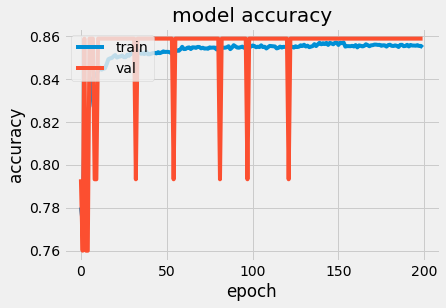

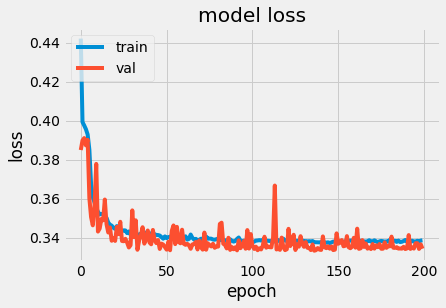

In [30]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
#final test accuracy
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1250/1250 [==============================] - 2s 2ms/step - loss: 0.3294 - accuracy: 0.8620
Accuracy 0.8619999885559082


In [ ]:
#testing individual data points
df = pd.DataFrame(data={
  "RSSI": np.array([-55, -65, -70]),
  "target": np.array([1, 0, 0])
})

ds = df_to_dataset(df)
model.predict_classes(ds)